In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [9]:
dataset.shape

(92000, 1025)

In [12]:
df = dataset.sample(frac=1).reset_index(drop = True)

In [13]:
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_05_kna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_23_ba
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_11_taamatar
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_21_pa
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7


In [20]:
train_df = df[0:73600].copy()
test_df = df[73600:].copy()

In [22]:
label = train_df['character'].values

In [23]:
label

array(['character_05_kna', 'character_23_ba', 'character_11_taamatar',
       ..., 'digit_7', 'character_35_tra', 'character_27_ra'],
      dtype=object)

In [35]:
y_train = np.zeros([train_df.shape[0], df['character'].unique().shape[0]])

In [36]:
y_train.shape

(73600, 46)

In [37]:
y_test = np.zeros([test_df.shape[0], df['character'].unique().shape[0]])
y_test.shape

(18400, 46)

In [38]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y_train = binencoder.fit_transform(label)

In [39]:
y_train[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
label_test = test_df['character'].values
label_test

array(['character_06_cha', 'digit_2', 'character_09_jha', ...,
       'character_13_daa', 'character_30_motosaw', 'character_33_ha'],
      dtype=object)

In [43]:
binecoder = LabelBinarizer()
y_test = binencoder.fit_transform(label_test)

In [47]:
y_test[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [64]:
X_train = train_df.drop(['character'], axis = 1)
X_test = test_df.drop(['character'], axis = 1)


AttributeError: 'DataFrame' object has no attribute 'type'

In [68]:
X_train.shape, X_test.shape

((73600, 1024), (18400, 1024))

In [69]:
X_train = np.reshape(X_train, (X_train.shape[0], 32, 32, 1))

In [70]:
X_train.shape

(73600, 32, 32, 1)

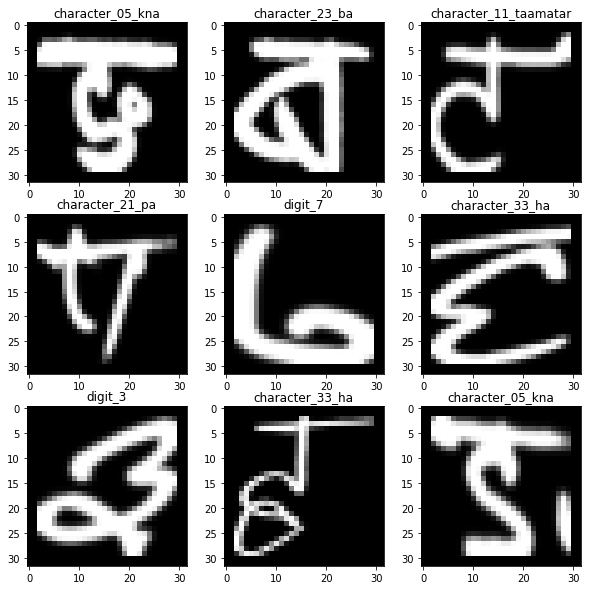

In [88]:
plt.figure(figsize = (10, 10))
for i in range(0, 9):
    plt.subplot(330+1+i)
    plt.title(str(label[i]))
    plt.imshow(X_train[i].reshape(32,32), cmap = 'gray')
plt.show()

In [89]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

Using TensorFlow backend.


In [107]:
def cnn (input_shape):
    X_in = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_in)
    
    X = Conv2D(filters = 32, kernel_size = (5,5), strides = (1,1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same')(X)
    X = Dropout(0.2)(X)
    
    X = Conv2D(filters = 64, kernel_size = (5,5), strides = (1,1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (3,3), strides = (3,3), padding = 'same')(X)
    X = Dropout(0.2)(X)
    
    X = Flatten()(X)    
    X = Dense(400, activation = 'relu')(X)
    X = Dense(128, activation = 'relu')(X)
    X = Dense(46, activation = 'softmax')(X)
    
    model = Model(inputs = X_in, outputs = X, name = 'cnndev')
    return model

In [108]:
model = cnn((32,32,1))

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 38, 38, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 34, 34, 32)        832       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 34, 34, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 34, 34, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 17, 17, 32)        0         
__________

In [113]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
hist = model.fit(X_train, y_train, epochs = 10,batch_size = 128,  verbose = 1, validation_split = 0.1)

Instructions for updating:
Use tf.cast instead.
Train on 66240 samples, validate on 7360 samples
Epoch 1/10
66240/66240 [==============================] - 251s 4ms/step - loss: 0.7905 - acc: 0.7775 - val_loss: 0.2176 - val_acc: 0.9346
Epoch 2/10
66240/66240 [==============================] - 210s 3ms/step - loss: 0.1985 - acc: 0.9380 - val_loss: 0.1255 - val_acc: 0.9595
Epoch 3/10
66240/66240 [==============================] - 208s 3ms/step - loss: 0.1322 - acc: 0.9587 - val_loss: 0.1130 - val_acc: 0.9640
Epoch 4/10
66240/66240 [==============================] - 208s 3ms/step - loss: 0.1019 - acc: 0.9681 - val_loss: 0.0958 - val_acc: 0.9705
Epoch 5/10
66240/66240 [==============================] - 208s 3ms/step - loss: 0.0840 - acc: 0.9729 - val_loss: 0.1495 - val_acc: 0.9543
Epoch 6/10
66240/66240 [==============================] - 210s 3ms/step - loss: 0.0681 - acc: 0.9779 - val_loss: 0.0814 - val_acc: 0.9762
Epoch 7/10
66240/66240 [==============================] - 208s 3ms/step - l

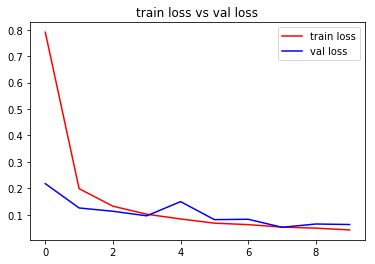

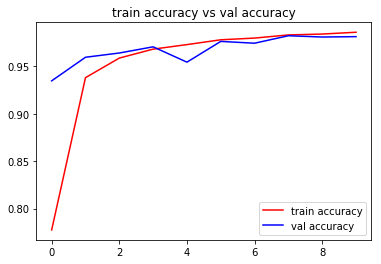

<Figure size 432x288 with 0 Axes>

In [114]:
#visualizing losses and accuracy
%matplotlib inline
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label = 'train loss')
plt.plot(epochs, val_loss, 'b', label = 'val loss')
plt.title('train loss vs val loss')
plt.legend()
plt.figure()

plt.plot(epochs, train_acc, 'r', label = 'train accuracy')
plt.plot(epochs, val_acc, 'b', label = 'val accuracy')
plt.title('train accuracy vs val accuracy')
plt.legend()
plt.figure()

model.save('Devanagiri_Model.h5')

In [118]:
#haven't reshaped X_test so we'll do that now
X_test = test_df.drop(['character'], axis = 1)
X_test = X_test.as_matrix()
X_test = np.reshape(X_test, (X_test.shape[0], 32, 32, 1))
model.evaluate(X_test, y_test)

/home/aditya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


18400/18400 [==============================] - 19s 1ms/step


[0.06532616734140269, 0.9815760869565218]

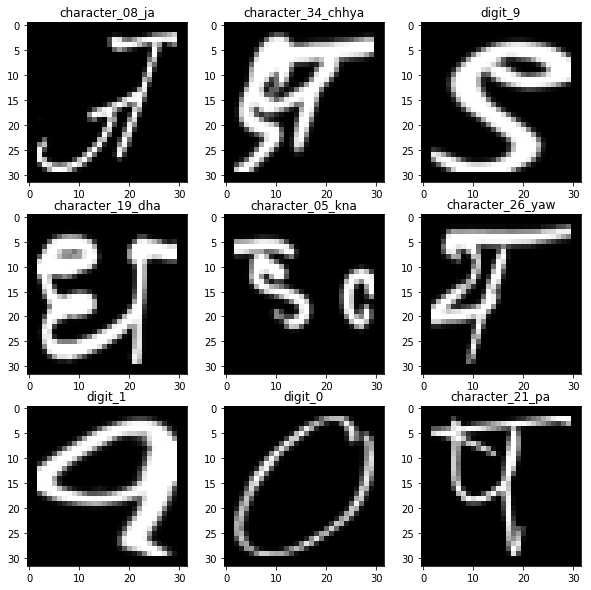

In [121]:
plt.figure(figsize = (10, 10))
for i in range (0, 9):
    plt.subplot(330 + 1 + i)
    plt.title(str(label_test[i+5]))
    plt.imshow(X_test[i+5].reshape((32,32)), cmap = 'gray')

plt.show()

In [149]:
pred = model.predict(X_test, verbose = 1)

18400/18400 [==============================] - 18s 990us/step


In [155]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(pred, axis=1), target_names=[c.split("_")[-1] for c in binencoder.classes_],digits=4))

              precision    recall  f1-score   support

          ka     1.0000    0.9801    0.9900       403
         kha     0.9925    0.9925    0.9925       401
          ga     0.9951    0.9758    0.9853       413
         gha     0.9337    0.9922    0.9620       383
         kna     0.9880    0.9856    0.9868       416
         cha     0.9976    0.9928    0.9952       416
        chha     0.9787    0.9787    0.9787       423
          ja     0.9764    0.9857    0.9810       420
         jha     0.9975    1.0000    0.9987       393
         yna     0.9925    0.9826    0.9875       403
    taamatar     0.9770    0.9795    0.9783       391
        thaa     1.0000    0.9612    0.9802       387
         daa     0.9793    0.9743    0.9768       389
        dhaa     0.9207    0.9897    0.9539       387
        adna     0.9728    0.9924    0.9825       397
      tabala     0.9774    0.9798    0.9786       397
         tha     0.9767    0.9496    0.9630       397
          da     0.9861    

In [189]:
predictimage = np.reshape(X_test[100], (1, 32,32, 1))

(1, 32, 32, 1)


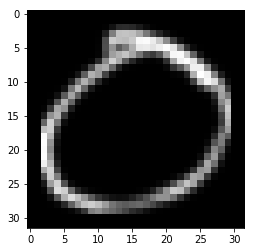

In [190]:
#nothing like some good ol' human checking
print(predictimage.shape)
plt.imshow(X_test[100].reshape((32,32)), cmap = 'gray')

In [191]:
pred_class = list(model.predict(predictimage)[0]).index(max(model.predict(predictimage)[0]))

In [192]:
print(pred_class)

36
